In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("UNSW_NB15_training-set.csv", encoding='cp1252')

## Attack Types in Data

In [259]:
attack_types = train["attack_cat"].unique()
attack_types

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

## DoS and Exploits

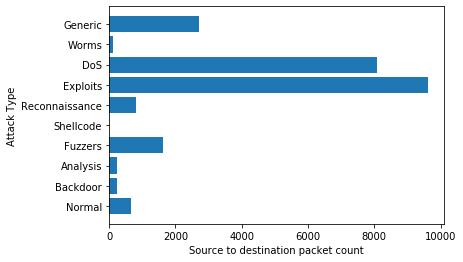

In [260]:
max_spkts = []
for atk in attack_types:
    max_spkts.append(train.loc[np.where(train["attack_cat"] == atk)].describe()["spkts"]["max"])
    
fig = plt.figure()
plt.ylabel("Attack Type")
plt.xlabel("Source to destination packet count")
plt.barh(attack_types, max_spkts)
plt.show()

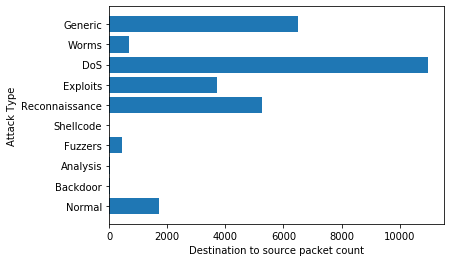

In [261]:
max_dpkts = []
for atk in attack_types:
    max_dpkts.append(train.loc[np.where(train["attack_cat"] == atk)].describe()["dpkts"]["max"])
    
fig2 = plt.figure()
plt.ylabel("Attack Type")
plt.xlabel("Destination to source packet count")
plt.barh(attack_types, max_dpkts)
plt.show()

## Worms

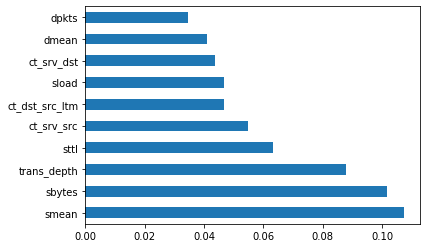

In [262]:
X= train.loc[np.where(train["attack_cat"].isin(["Normal", "Worms"]))].iloc[:,5:43]
y = train.loc[np.where(train["attack_cat"].isin(["Normal", "Worms"]))]["label"]

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y) #feature_importances of tree based classifiers

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

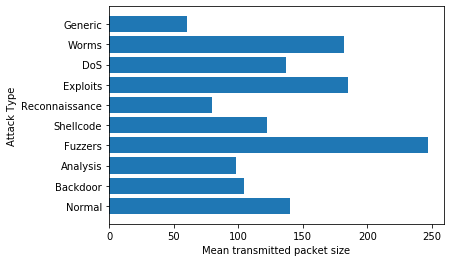

In [263]:
max_spkts = []
for atk in attack_types:
    max_spkts.append(train.loc[np.where(train["attack_cat"] == atk)].describe()["smean"]["mean"])
    
fig = plt.figure()
plt.ylabel("Attack Type")
plt.xlabel("Mean transmitted packet size")
plt.barh(attack_types, max_spkts)
plt.show()

## Shellcode

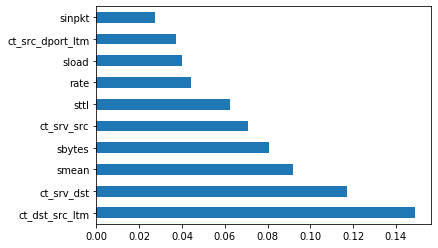

In [264]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

X= train.loc[np.where(train["attack_cat"].isin(["Normal", "Shellcode"]))].iloc[:,5:43]
y = train.loc[np.where(train["attack_cat"].isin(["Normal", "Shellcode"]))]["label"]

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y) #feature_importances of tree based classifiers

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Fuzzers

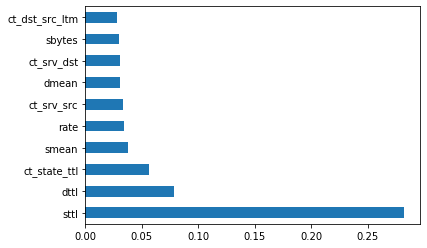

In [265]:
X= train.loc[np.where(train["attack_cat"].isin(["Normal", "Fuzzers"]))].iloc[:,5:43]
y = train.loc[np.where(train["attack_cat"].isin(["Normal", "Fuzzers"]))]["label"]

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y) #feature_importances of tree based classifiers

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

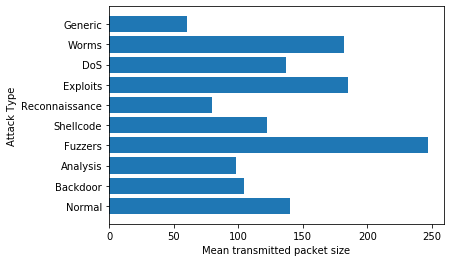

In [267]:
max_spkts = []
for atk in attack_types:
    max_spkts.append(train.loc[np.where(train["attack_cat"] == atk)].describe()["smean"]["mean"])
    
fig = plt.figure()
plt.ylabel("Attack Type")
plt.xlabel("Mean transmitted packet size")
plt.barh(attack_types, max_spkts)
plt.show()